In [13]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (24, 18), 
        "axes.titlesize" : 18 
    }
)

Populating the interactive namespace from numpy and matplotlib


In [43]:
df = pd.read_csv('data/train.csv')

In [44]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [47]:
gender_map = {'male':0, 'female':1}
df['Sex0'] = df['Sex'].map(gender_map)

In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex0
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05F7B450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0CC123F0>]], dtype=object)

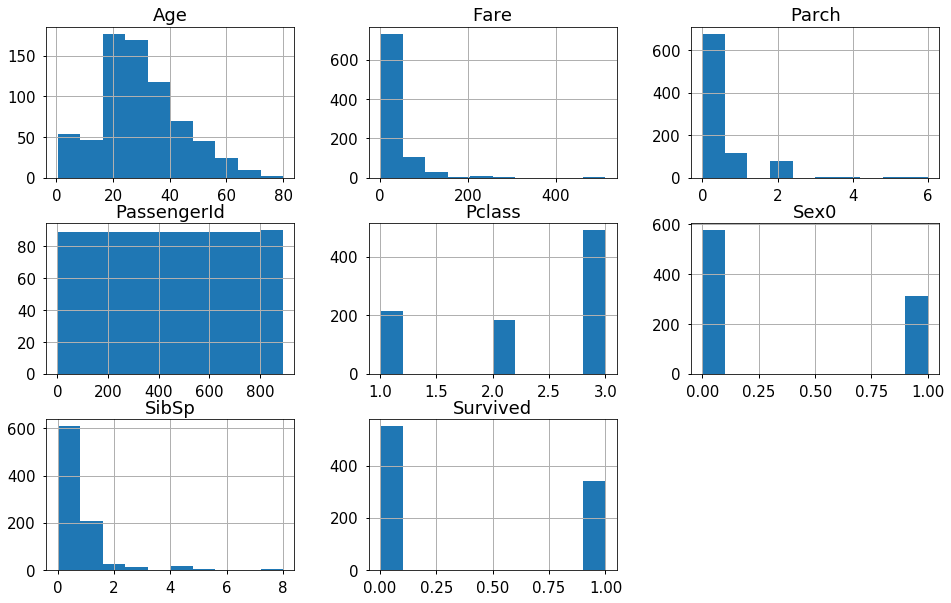

In [49]:
df.hist()

In [53]:
df.groupby(['Survived'])[df.columns].agg([np.mean, np.std])

PassengerId             Survived         Pclass                  Age  \
                mean         std     mean  std      mean       std       mean   
Survived                                                                        
0         447.016393  260.640469        0  0.0  2.531876  0.735805  30.626179   
1         444.368421  252.358840        1  0.0  1.950292  0.863321  28.343690   

                        SibSp               Parch                 Fare  \
                std      mean       std      mean       std       mean   
Survived                                                                 
0         14.172110  0.553734  1.288399  0.329690  0.823166  22.117887   
1         14.950952  0.473684  0.708688  0.464912  0.771712  48.395408   

                         Sex0            
                std      mean       std  
Survived                                 
0         31.388207  0.147541  0.354968  
1         66.596998  0.681287  0.466660

In [40]:
df.groupby(['Pclass'])['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


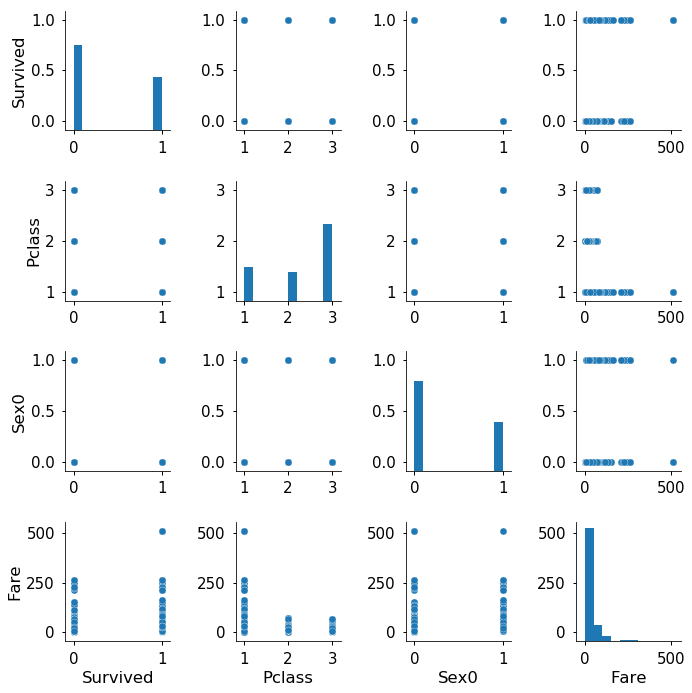

In [61]:
cols = ['Survived', 'Pclass', 'Sex0', 'Fare'] # , 'Age', 'SibSp', 'Parch'
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

In [56]:
df.info(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex0'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Sex0           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 73.1+ KB
